<a href="https://colab.research.google.com/github/Samplergithub769/mtu-xsens-imu-Sensor/blob/main/mtu_xsens_imu_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Load Datasets**

In [338]:
df_25hz = pd.read_csv("/content/25hz.csv", skiprows=12)
df_50hz = pd.read_csv("/content/50hz.csv", skiprows=12)
df_100hz = pd.read_csv("/content/100hz.csv", skiprows=12)
df_noise_25hz = pd.read_csv("/content/Noise_25HZ.csv", skiprows=12)
df_noise_50hz = pd.read_csv("/content/Noise_50hz.csv", skiprows=12)
df_noise_100hz = pd.read_csv("/content/Noise_100hz.csv", skiprows=12)


**Display the first few rows and information for each DataFrame**

In [339]:
print("25hz.csv:")
print(df_25hz.head())

print("\n50hz.csv:")
print(df_50hz.head())

print("\n100hz.csv:")
print(df_100hz.head())

print("\nNoise_25HZ.csv:")
print(df_noise_25hz.head())

print("\nNoise_50hz.csv:")
print(df_noise_50hz.head())

print("\nNoise_100hz.csv:")
print(df_noise_100hz.head())

25hz.csv:
   PacketCounter  SampleTimeFine  Acc_X  Acc_Y  Acc_Z   AccHR_X   AccHR_Y  \
0          57364        38214066    0.0    0.0    0.0 -0.004889  0.327786   
1          57366        38214106    0.0    0.0    0.0 -0.043509  0.356337   
2          57368        38214145    0.0    0.0    0.0 -0.029078  0.342039   
3          57369        38214165    0.0    0.0    0.0 -0.000167  0.342172   
4          57371        38214205    0.0    0.0    0.0  0.019263  0.313533   

    AccHR_Z  Mag_X  Mag_Y  Mag_Z  Roll  Pitch  Yaw  Temperature  
0  9.762954    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
1  9.739222    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
2  9.739135    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
3  9.762895    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
4  9.781975    0.0    0.0    0.0   0.0    0.0  0.0          0.0  

50hz.csv:
   PacketCounter  SampleTimeFine     Acc_X     Acc_Y     Acc_Z   AccHR_X  \
0          36606         7038992 -0.101958  

In [340]:
print("Info for df_25hz:")
df_25hz.info()
print("\nMissing values in df_25hz:")
print(df_25hz.isnull().sum())

print("\nInfo for df_50hz:")
df_50hz.info()
print("\nMissing values in df_50hz:")
print(df_50hz.isnull().sum())

print("\nInfo for df_100hz:")
df_100hz.info()
print("\nMissing values in df_100hz:")
print(df_100hz.isnull().sum())

print("\nInfo for df_noise_25hz:")
df_noise_25hz.info()
print("\nMissing values in df_noise_25hz:")
print(df_noise_25hz.isnull().sum())

print("\nInfo for df_noise_50hz:")
df_noise_50hz.info()
print("\nMissing values in df_noise_50hz:")
print(df_noise_50hz.isnull().sum())

print("\nInfo for df_noise_100hz:")
df_noise_100hz.info()
print("\nMissing values in df_noise_100hz:")
print(df_noise_100hz.isnull().sum())

Info for df_25hz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PacketCounter   530000 non-null  int64  
 1   SampleTimeFine  530000 non-null  int64  
 2   Acc_X           530000 non-null  float64
 3   Acc_Y           530000 non-null  float64
 4   Acc_Z           530000 non-null  float64
 5   AccHR_X         530000 non-null  float64
 6   AccHR_Y         530000 non-null  float64
 7   AccHR_Z         530000 non-null  float64
 8   Mag_X           530000 non-null  float64
 9   Mag_Y           530000 non-null  float64
 10  Mag_Z           530000 non-null  float64
 11  Roll            530000 non-null  float64
 12  Pitch           530000 non-null  float64
 13  Yaw             530000 non-null  float64
 14  Temperature     530000 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 60.7 MB

Missing values in df_25hz:
PacketCou

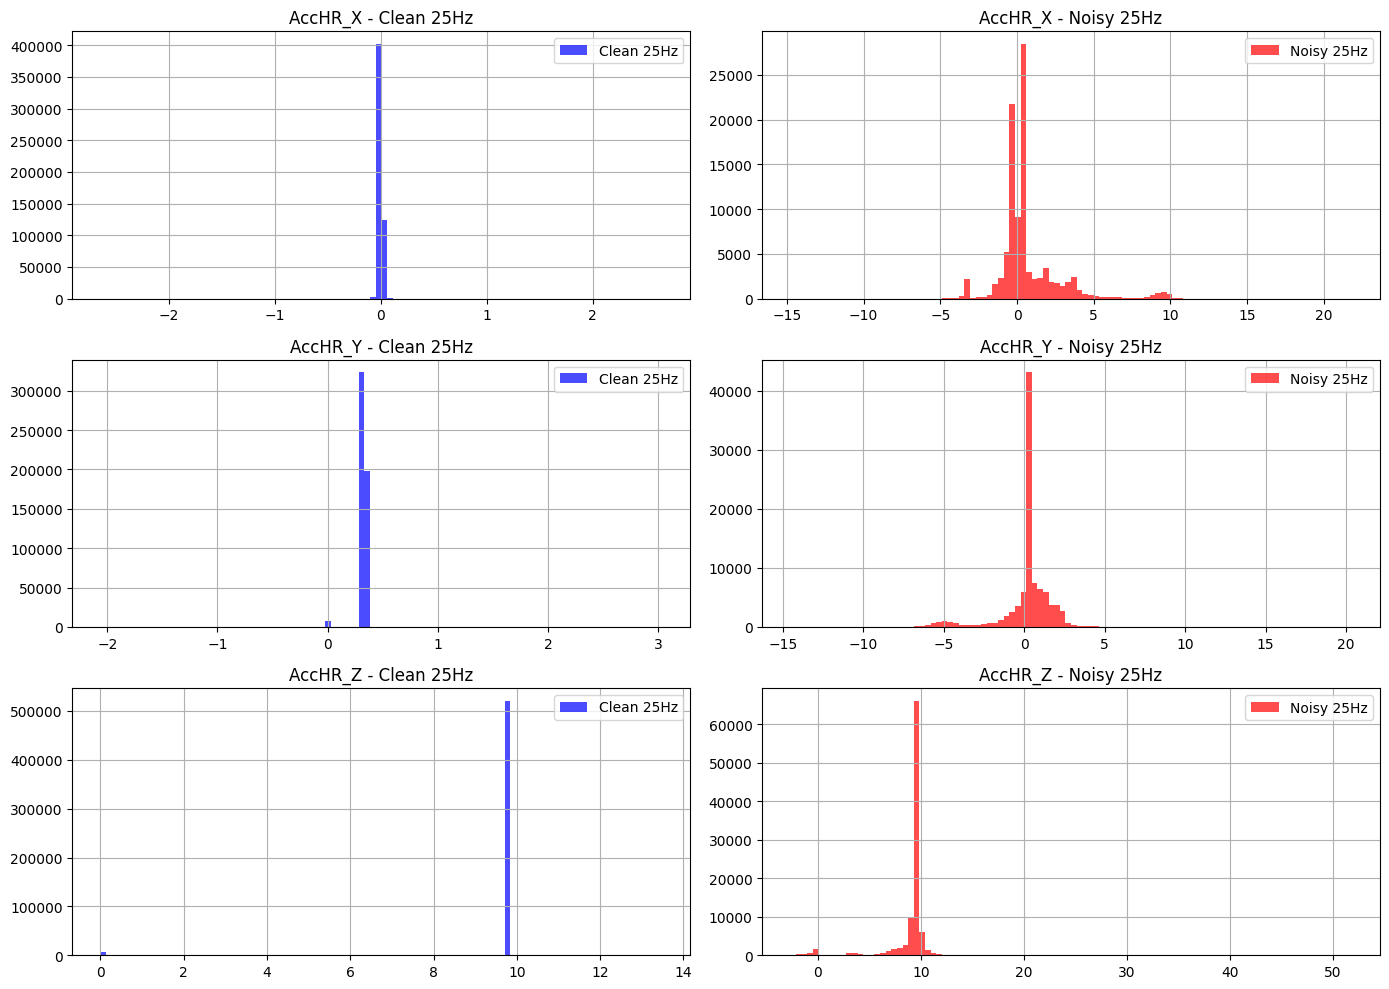

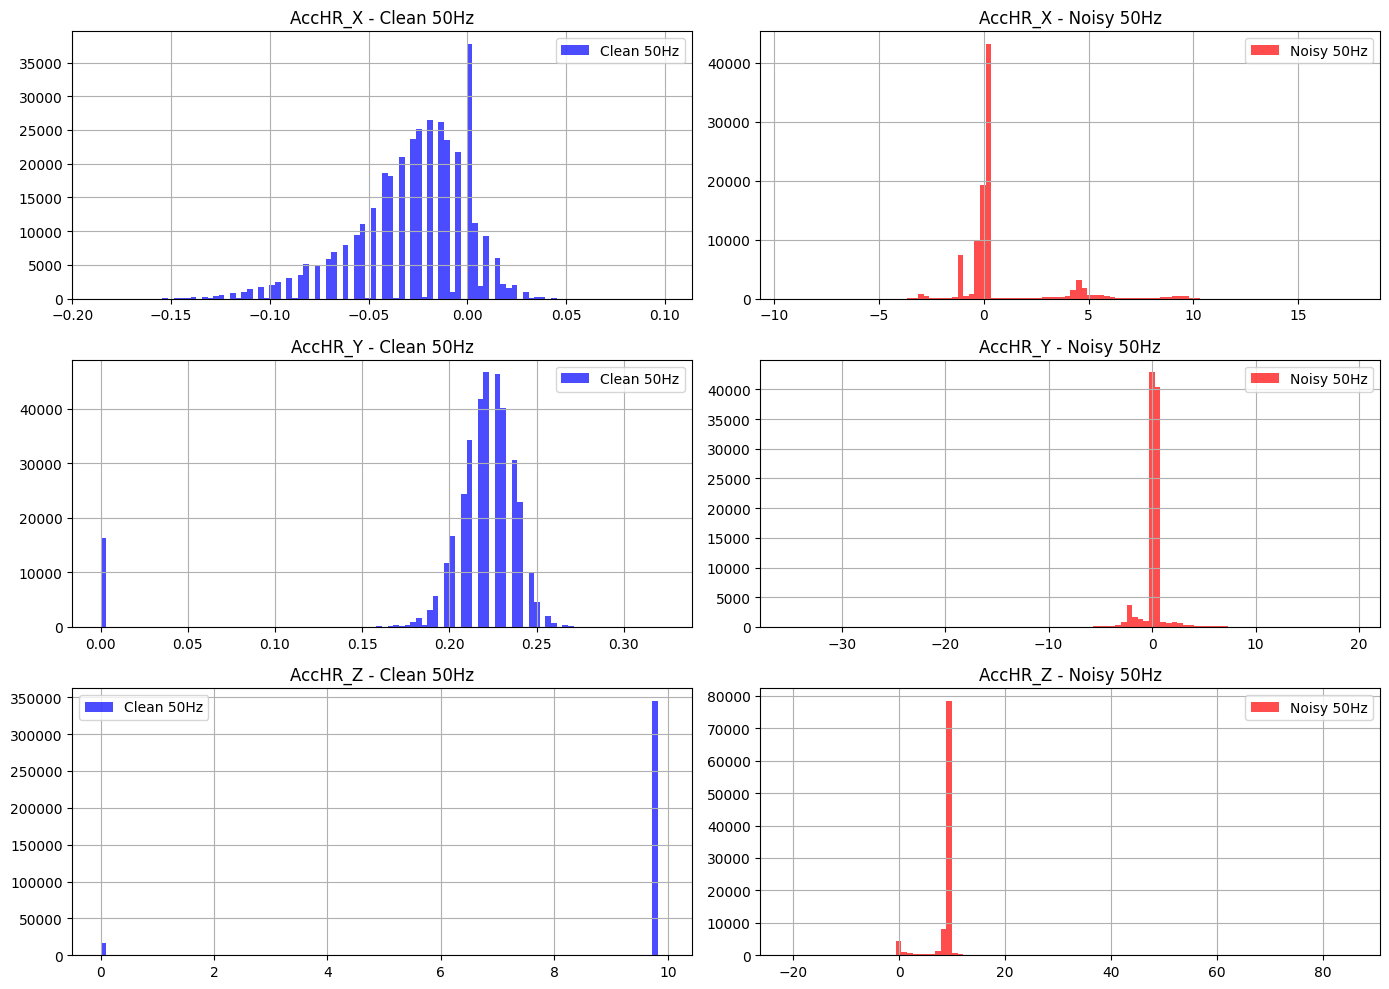

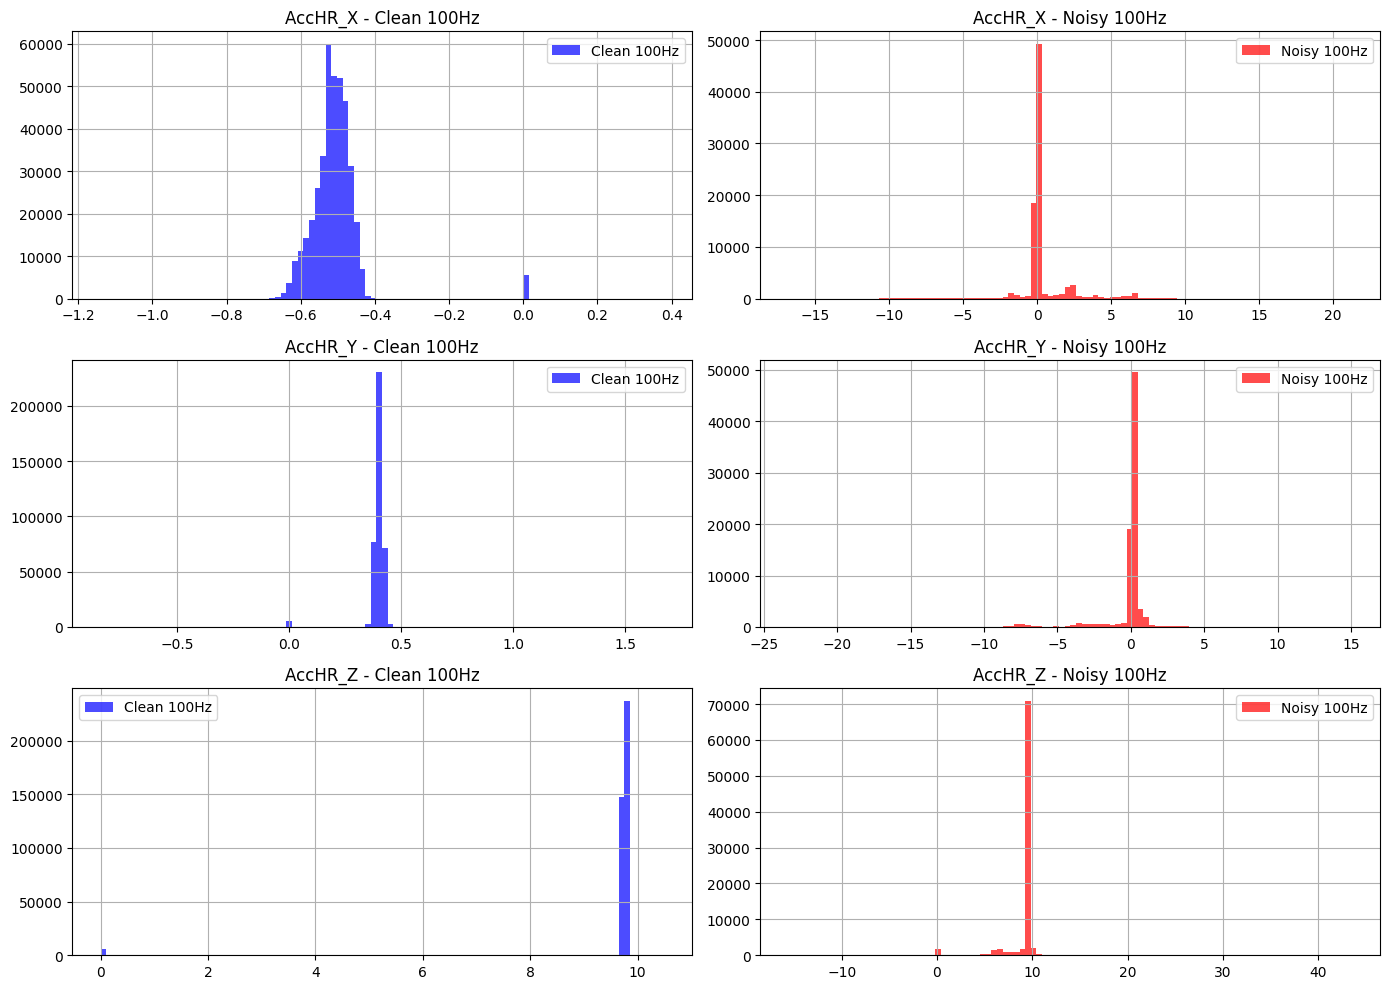

In [341]:
#Define the columns for analysis
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Function to plot histograms side by side
def plot_histograms(clean_df, noisy_df, label):
    plt.figure(figsize=(14, 10))
    for i, col in enumerate(acc_cols):
        plt.subplot(3, 2, 2*i + 1)
        plt.hist(clean_df[col], bins=100, alpha=0.7, color='blue', label=f'Clean {label}')
        plt.title(f'{col} - Clean {label}')
        plt.grid(True)
        plt.legend()

        plt.subplot(3, 2, 2*i + 2)
        plt.hist(noisy_df[col], bins=100, alpha=0.7, color='red', label=f'Noisy {label}')
        plt.title(f'{col} - Noisy {label}')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

# Use the function for each frequency
plot_histograms(df_25hz, df_noise_25hz, "25Hz")
plot_histograms(df_50hz, df_noise_50hz, "50Hz")
plot_histograms(df_100hz, df_noise_100hz, "100Hz")




**Box Plots**

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


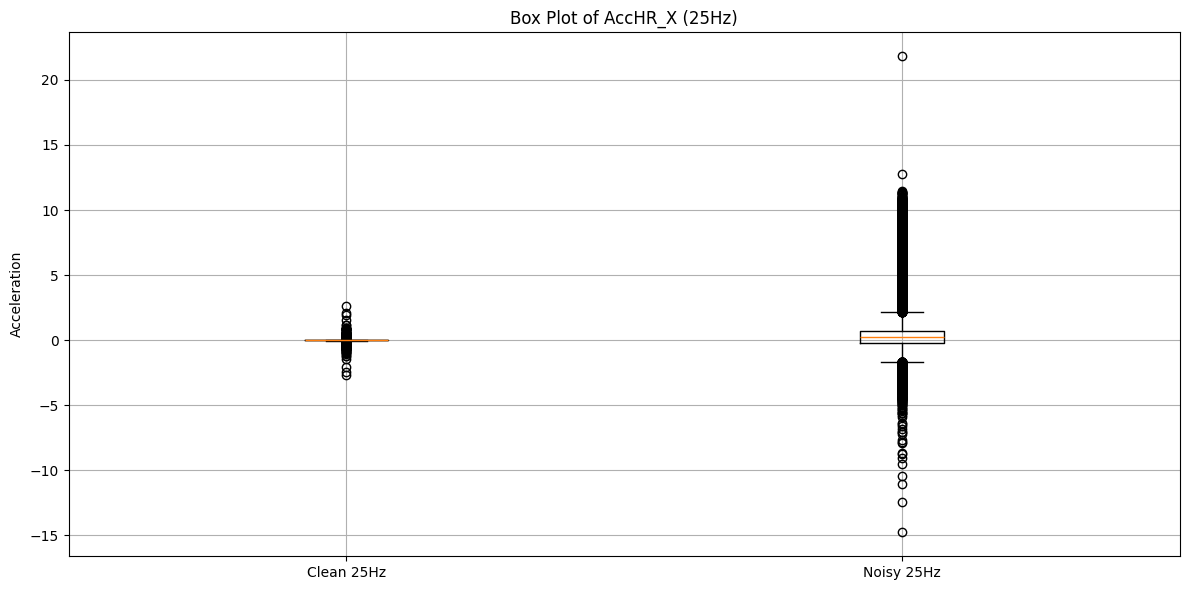

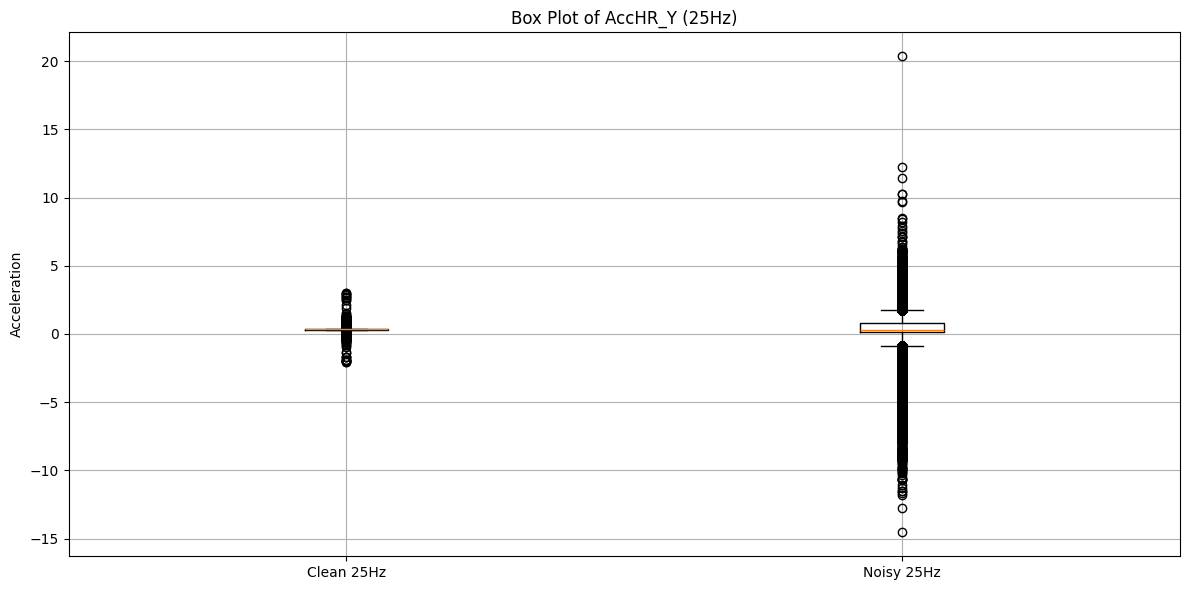

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


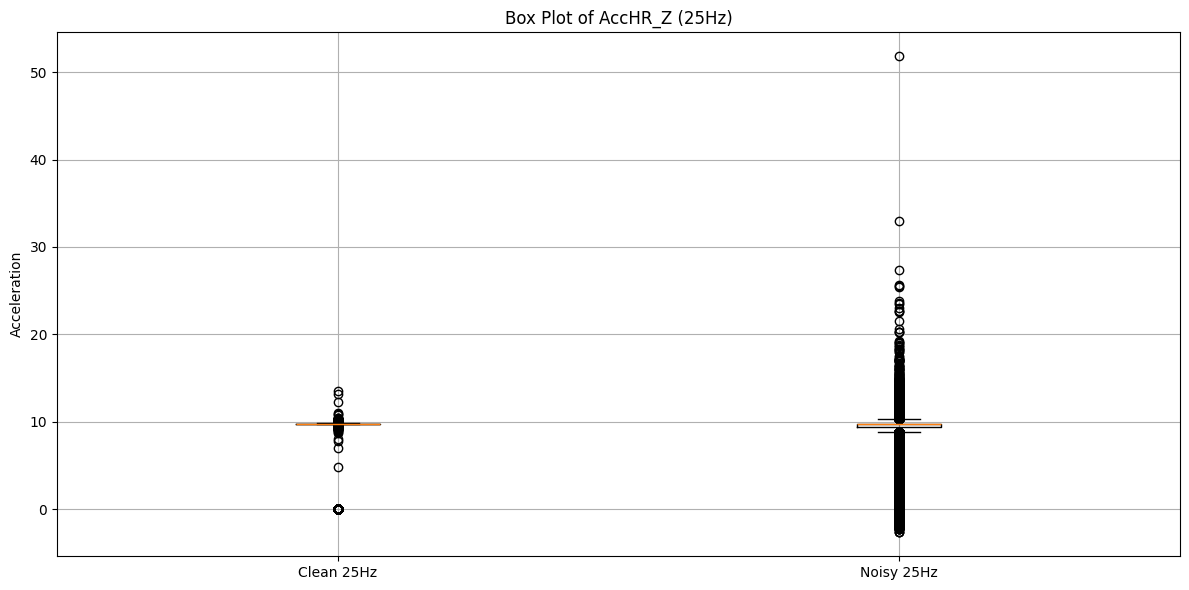

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


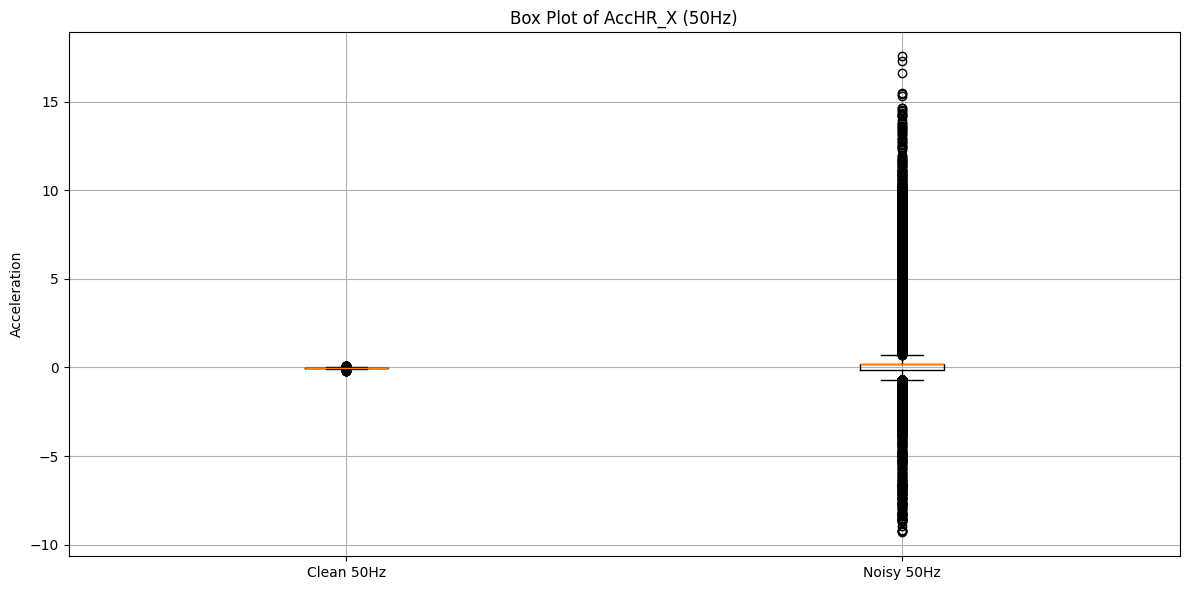

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


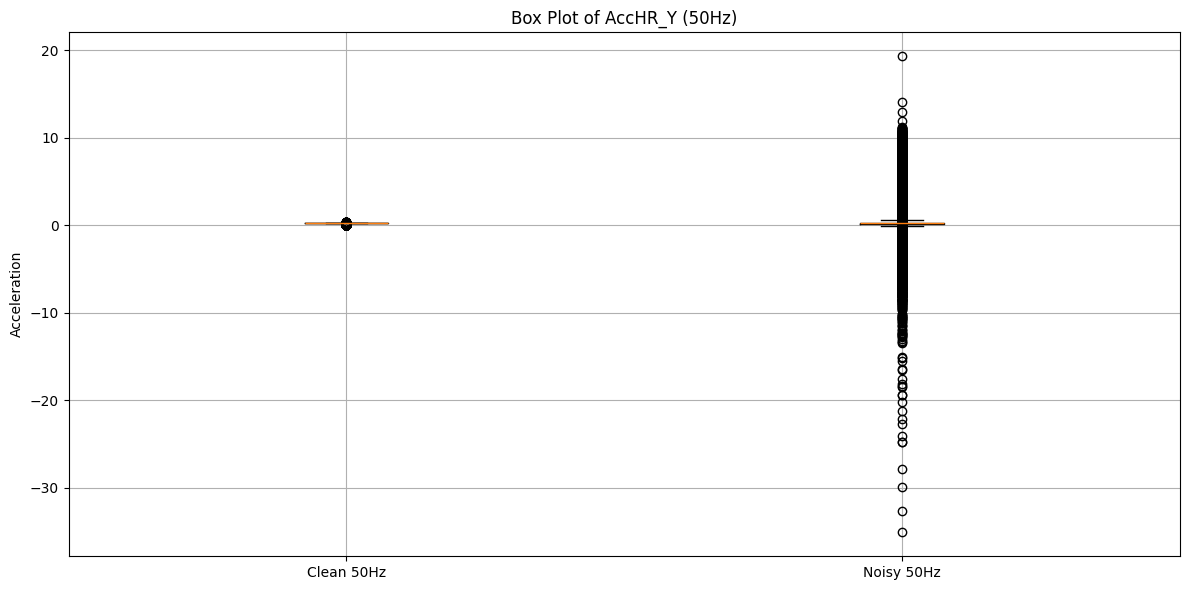

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


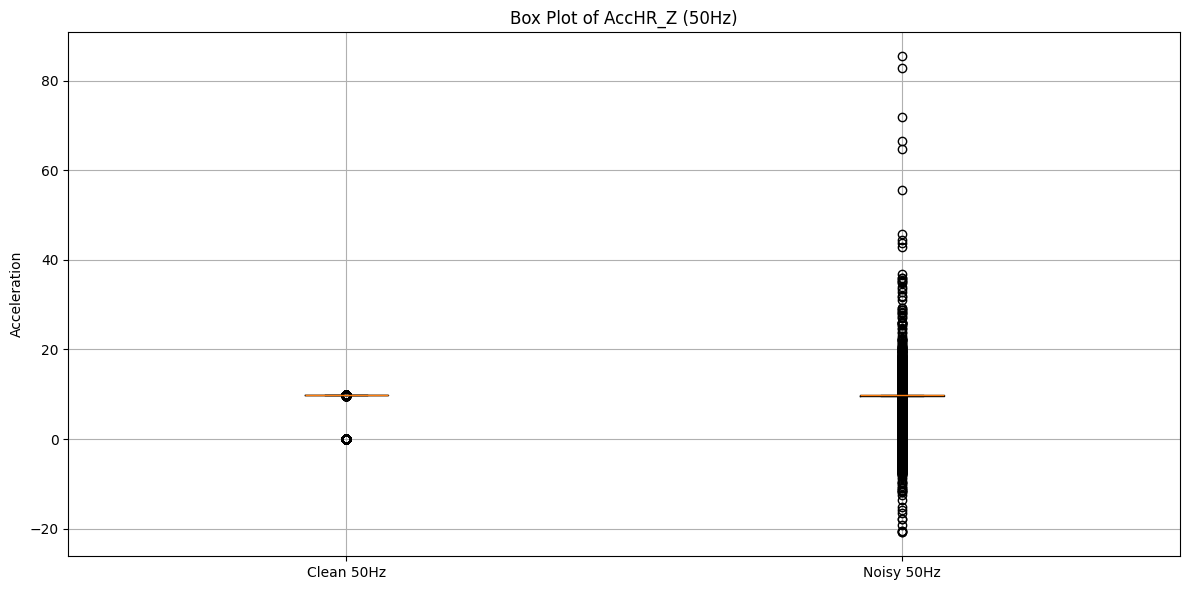

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


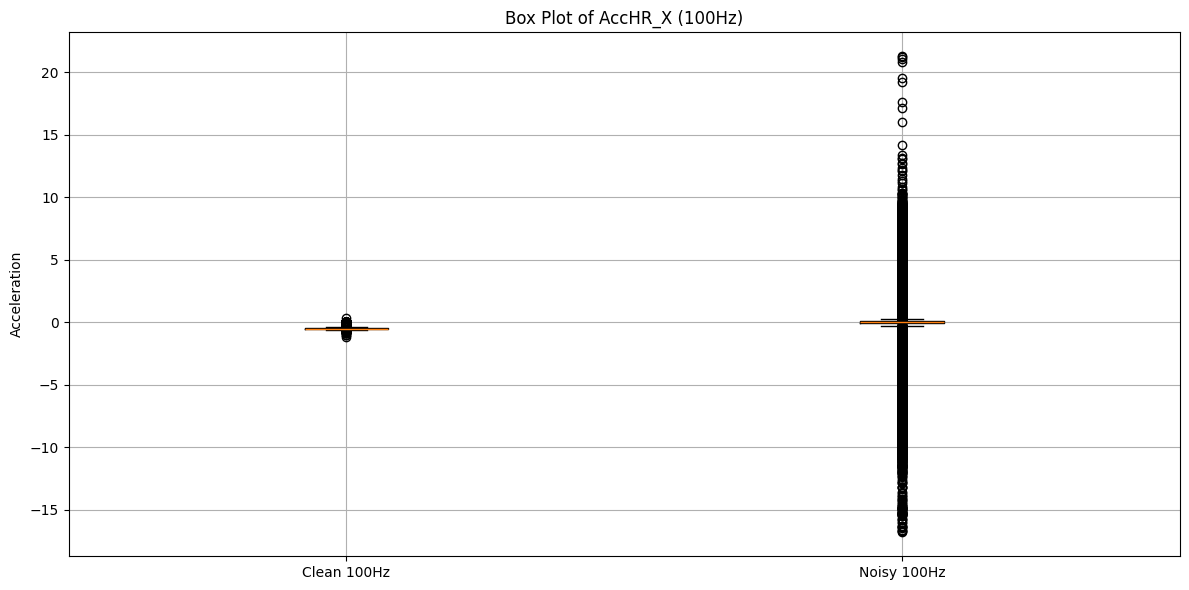

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


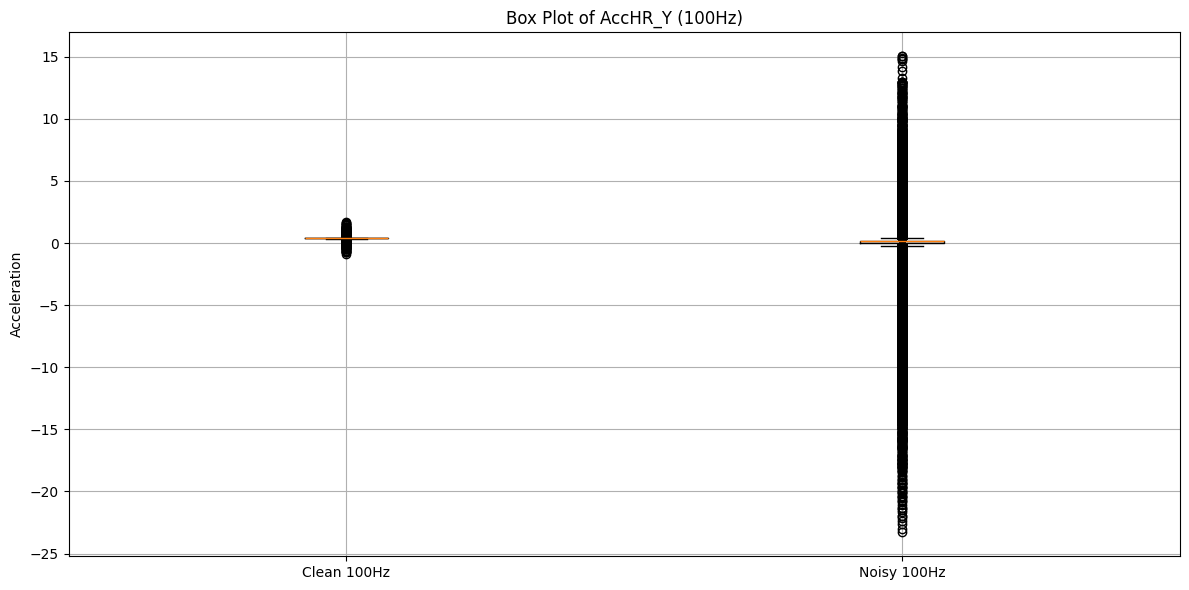

<ipython-input-342-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


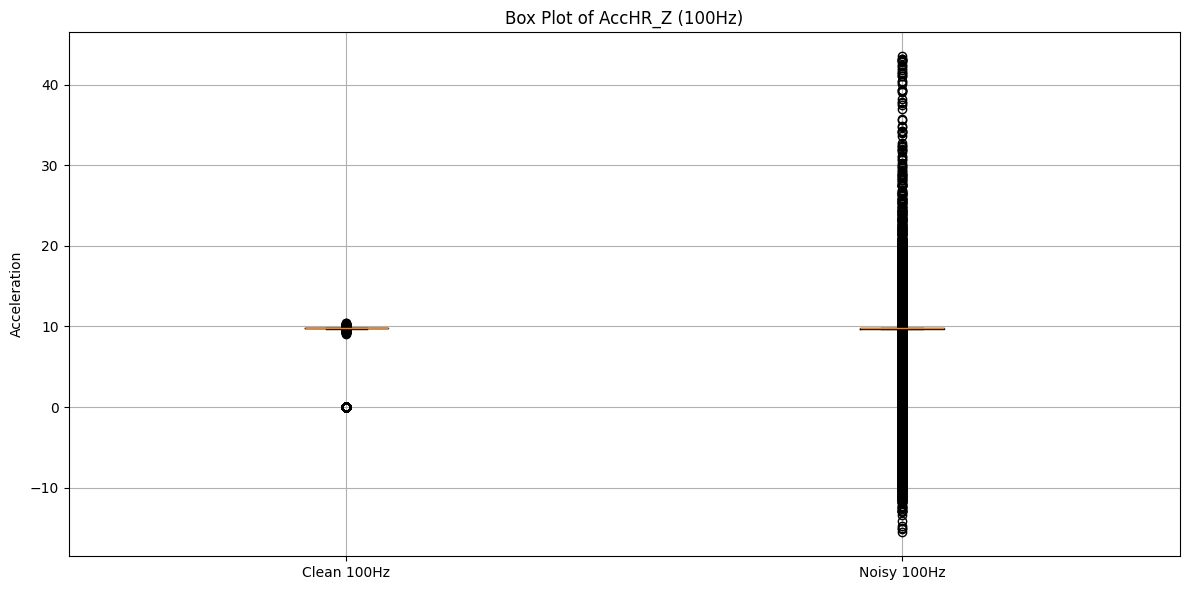

In [342]:
# Prepare data for box plots
data = {
    '25Hz': {
        'Clean': df_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']],
        'Noisy': df_noise_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']]
    },
    '50Hz': {
        'Clean': df_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']],
        'Noisy': df_noise_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']]
    },
    '100Hz': {
        'Clean': df_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']],
        'Noisy': df_noise_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']]
    }
}

axes = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Plot boxplots using loop
for freq, sets in data.items():
    for axis in axes:
        plt.figure(figsize=(12, 6))
        plt.boxplot([
            sets['Clean'][axis].dropna(),
            sets['Noisy'][axis].dropna()
        ], labels=[f'Clean {freq}', f'Noisy {freq}'])
        plt.title(f'Box Plot of {axis} ({freq})')
        plt.ylabel('Acceleration')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


**Create plots for Temperature vs SampleTimeFine for each dataset**

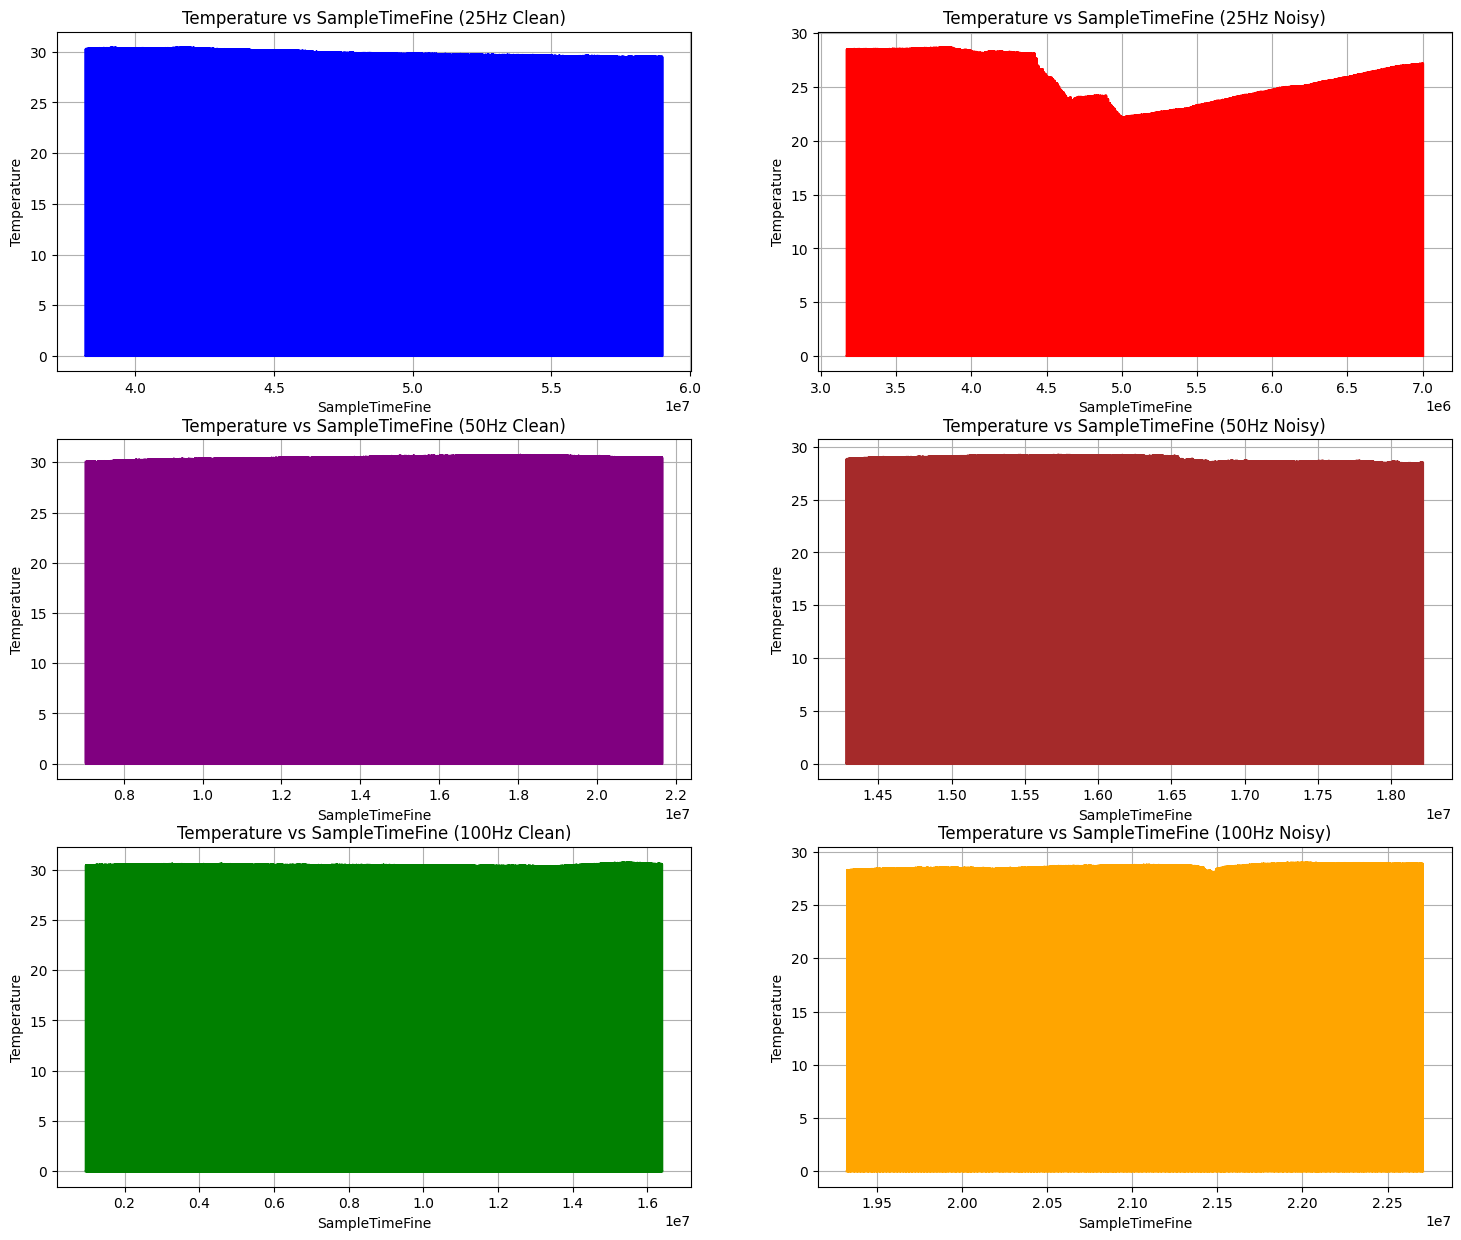

In [343]:
plt.figure(figsize=(18, 15))

# Plot for 25hz.csv
plt.subplot(3, 2, 1)
plt.plot(df_25hz['SampleTimeFine'], df_25hz['Temperature'], color='blue')
plt.title('Temperature vs SampleTimeFine (25Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_25HZ.csv
plt.subplot(3, 2, 2)
plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz['Temperature'], color='red')
plt.title('Temperature vs SampleTimeFine (25Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for 50hz.csv
plt.subplot(3, 2, 3)
plt.plot(df_50hz['SampleTimeFine'], df_50hz['Temperature'], color='purple')
plt.title('Temperature vs SampleTimeFine (50Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_50hz.csv
plt.subplot(3, 2, 4)
plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz['Temperature'], color='brown')
plt.title('Temperature vs SampleTimeFine (50Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)


# Plot for 100hz.csv
plt.subplot(3, 2, 5)
plt.plot(df_100hz['SampleTimeFine'], df_100hz['Temperature'], color='green')
plt.title('Temperature vs SampleTimeFine (100Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_100hz.csv
plt.subplot(3, 2, 6)
plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz['Temperature'], color='orange')
plt.title('Temperature vs SampleTimeFine (100Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

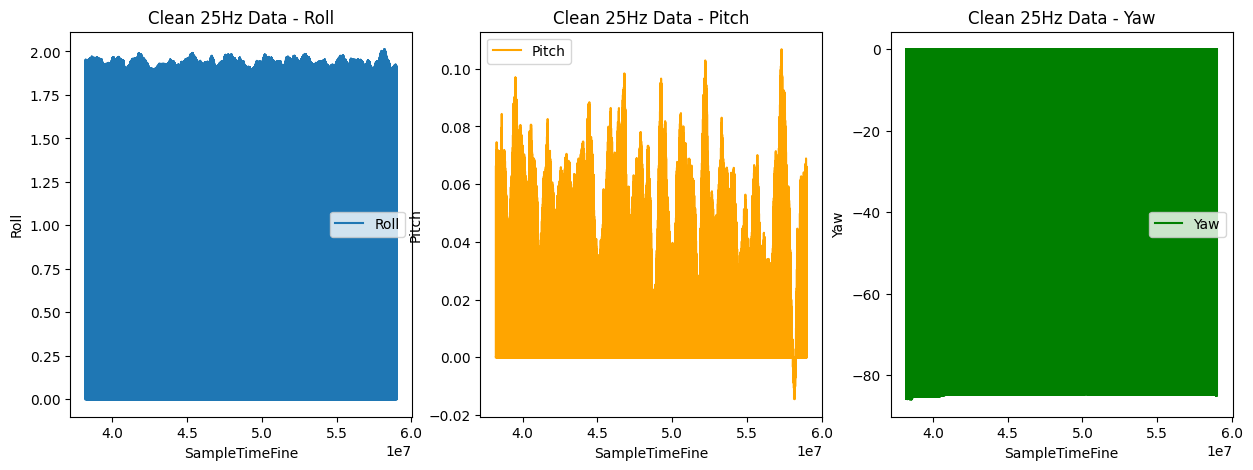

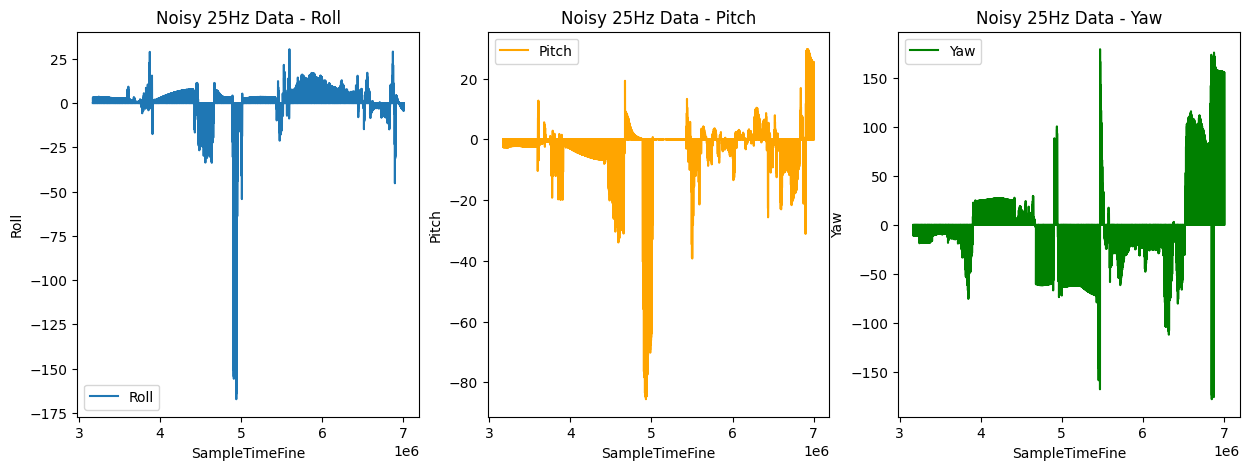

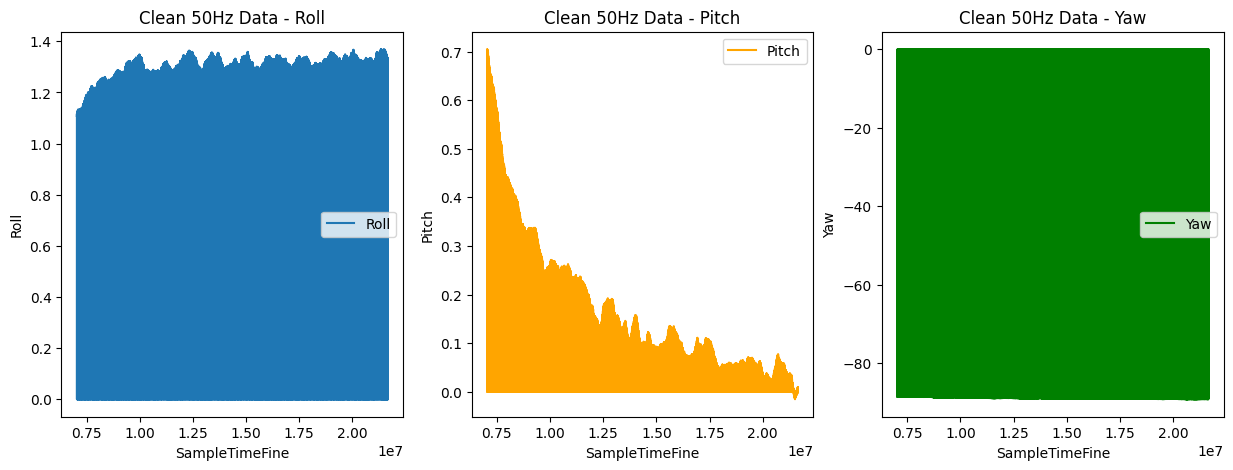

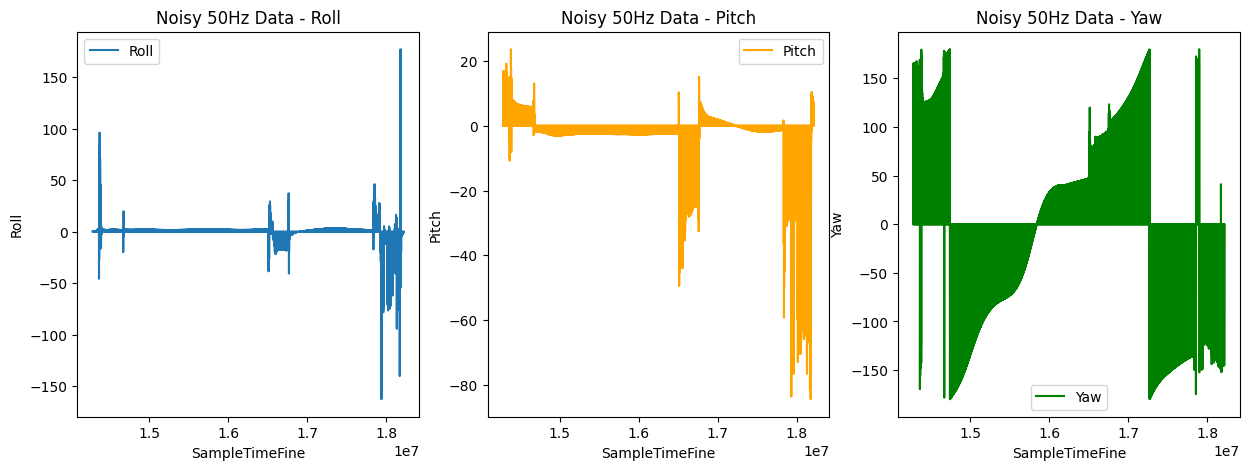

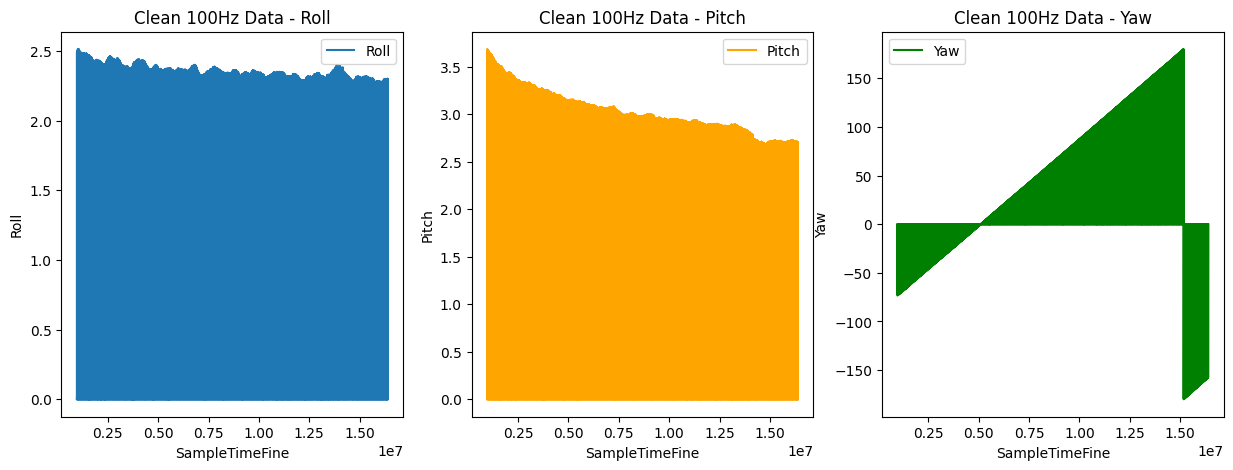

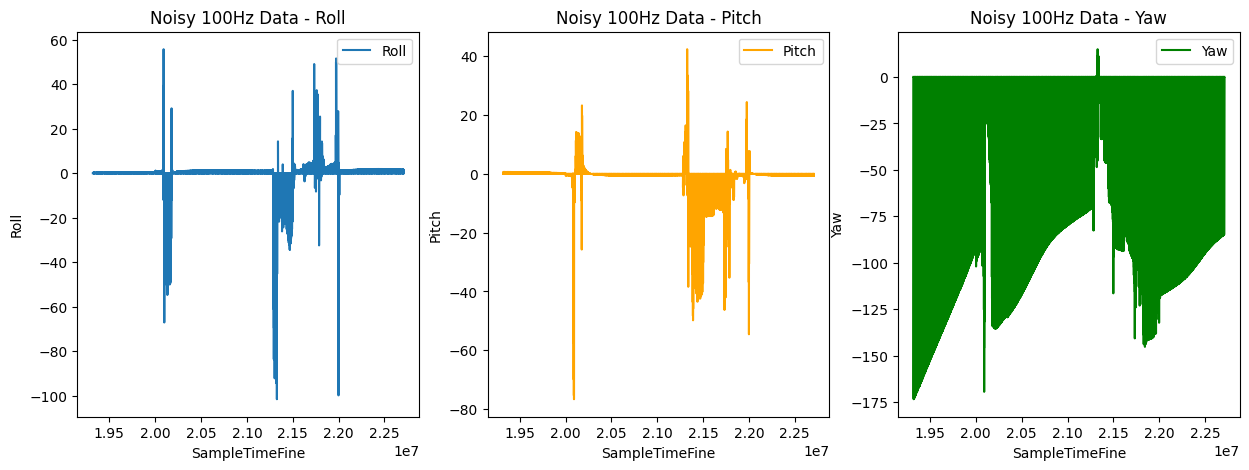

In [344]:
# Create a function to plot Roll, Pitch, Yaw data
def plot_rpy(df, title_prefix, filename_prefix):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(df['SampleTimeFine'], df['Roll'], label='Roll')
    plt.title(f'{title_prefix} - Roll')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Roll')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(df['SampleTimeFine'], df['Pitch'], label='Pitch', color='orange')
    plt.title(f'{title_prefix} - Pitch')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Pitch')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(df['SampleTimeFine'], df['Yaw'], label='Yaw', color='green')
    plt.title(f'{title_prefix} - Yaw')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Yaw')
    plt.legend()

# Plotting clean datasets
plot_rpy(df_25hz, 'Clean 25Hz Data', 'clean_25hz')
plot_rpy(df_noise_25hz, 'Noisy 25Hz Data', 'noisy_25hz')
plot_rpy(df_50hz, 'Clean 50Hz Data', 'clean_50hz')
plot_rpy(df_noise_50hz, 'Noisy 50Hz Data', 'noisy_50hz')
plot_rpy(df_100hz, 'Clean 100Hz Data', 'clean_100hz')
plot_rpy(df_noise_100hz, 'Noisy 100Hz Data', 'noisy_100hz')


**Calculate and print summary statistics for 'AccHR_X', 'AccHR_Y', 'AccHR_Z'**

In [345]:
print("Summary Statistics for 25Hz Clean Data:")
print(df_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 25Hz Noisy Data:")
print(df_noise_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 50Hz Clean Data:")
print(df_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 50Hz Noisy Data:")
print(df_noise_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 100Hz Clean Data:")
print(df_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 100Hz Noisy Data:")
print(df_noise_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

Summary Statistics for 25Hz Clean Data:
             AccHR_X        AccHR_Y        AccHR_Z
count  530000.000000  530000.000000  530000.000000
mean       -0.008408       0.326508       9.626153
std         0.020991       0.046046       1.166218
min        -2.649340      -2.061765       0.000000
25%        -0.019102       0.322987       9.757645
50%        -0.009313       0.332495       9.767488
75%         0.000315       0.337977       9.777254
max         2.656289       3.034816      13.491242

Summary Statistics for 25Hz Noisy Data:
            AccHR_X       AccHR_Y       AccHR_Z
count  97672.000000  97672.000000  97672.000000
mean       0.712076      0.170159      9.117952
std        2.080176      1.597833      2.029336
min      -14.780096    -14.544634     -2.665523
25%       -0.230897      0.134625      9.384631
50%        0.259690      0.294164      9.714080
75%        0.740436      0.793527      9.769021
max       21.826252     20.360428     51.830212

Summary Statistics for 50Hz

**Data Cleaning**

**Moving Average Filter**

In [346]:
# Define the columns for smoothing
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# 25Hz
window_size_25hz = 100
df_noise_25hz_cleaned = df_noise_25hz.copy()
for col in acc_cols:
    df_noise_25hz_cleaned[col] = df_noise_25hz[col].rolling(window=window_size_25hz).mean()

# 50Hz
window_size_50hz = 200
df_noise_50hz_cleaned = df_noise_50hz.copy()
for col in acc_cols:
    df_noise_50hz_cleaned[col] = df_noise_50hz[col].rolling(window=window_size_50hz).mean()

# 100Hz
window_size_100hz = 400
df_noise_100hz_cleaned = df_noise_100hz.copy()
for col in acc_cols:
    df_noise_100hz_cleaned[col] = df_noise_100hz[col].rolling(window=window_size_100hz).mean()





In [347]:
df_noise_25hz_cleaned


,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature
0,29451,3171089,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29453,3171129,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29455,3171169,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29457,3171208,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29460,3171248,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97667,35503,7002926,0.0,0.0,0.0,-3.267582,0.163119,8.886289,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97668,35505,7002966,0.0,0.0,0.0,-3.267343,0.162880,8.886048,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97669,35507,7003006,0.0,0.0,0.0,-3.267009,0.162786,8.885806,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97670,35509,7003045,0.0,0.0,0.0,-3.267392,0.162736,8.885856,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
df_noise_50hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature
0,7093,14284182,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,7095,14284222,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,7097,14284261,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,7101,14284332,-2.861004,0.047889,9.350098,NaN,NaN,NaN,0.315287,-0.661978,-0.510735,0.794072,16.812263,165.393556,28.85
4,7104,14284381,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97729,28315,18217244,0.000000,0.000000,0.000000,-0.951097,0.053569,9.465232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
97730,28319,18217324,0.000000,0.000000,0.000000,-0.950523,0.053548,9.465155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
97731,28322,18217363,0.000000,0.000000,0.000000,-0.949996,0.053526,9.465271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
97732,28324,18217403,0.000000,0.000000,0.000000,-0.949516,0.053552,9.465388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [349]:
df_noise_100hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature
0,16892,19319519,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16897,19319559,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16900,19319589,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16905,19319638,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16909,19319668,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85208,64667,22709038,0.0,0.0,0.0,0.084135,0.208990,9.528689,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85209,64672,22709078,0.0,0.0,0.0,0.084087,0.209002,9.528690,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85210,64676,22709118,0.0,0.0,0.0,0.084158,0.209038,9.528629,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85211,64681,22709157,0.0,0.0,0.0,0.084158,0.209050,9.528557,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
df_noise_25hz_cleaned = df_noise_25hz_cleaned.dropna().reset_index(drop=True)
df_noise_50hz_cleaned = df_noise_50hz_cleaned.dropna().reset_index(drop=True)
df_noise_100hz_cleaned = df_noise_100hz_cleaned.dropna().reset_index(drop=True)


In [351]:
df_noise_25hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature
0,29656,3174959,0.0,0.0,0.0,0.258668,0.241008,9.562409,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29658,3174999,0.0,0.0,0.0,0.258429,0.240863,9.562363,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29660,3175039,0.0,0.0,0.0,0.258144,0.240862,9.562556,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29662,3175079,0.0,0.0,0.0,0.258140,0.240958,9.562077,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29664,3175118,0.0,0.0,0.0,0.258092,0.240910,9.562077,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97568,35503,7002926,0.0,0.0,0.0,-3.267582,0.163119,8.886289,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97569,35505,7002966,0.0,0.0,0.0,-3.267343,0.162880,8.886048,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97570,35507,7003006,0.0,0.0,0.0,-3.267009,0.162786,8.885806,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97571,35509,7003045,0.0,0.0,0.0,-3.267392,0.162736,8.885856,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
df_noise_50hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature
0,7533,14292132,-2.880257,0.079586,9.333803,-2.770038,0.066711,9.014268,0.317296,-0.663449,-0.512237,0.759694,16.839018,165.403887,28.86
1,7536,14292181,0.000000,0.000000,0.000000,-2.770062,0.066807,9.014340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,7538,14292220,0.000000,0.000000,0.000000,-2.770134,0.066782,9.014388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,7539,14292240,0.000000,0.000000,0.000000,-2.770158,0.066806,9.014341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,7543,14292320,0.000000,0.000000,0.000000,-2.784505,0.067091,9.061151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97530,28315,18217244,0.000000,0.000000,0.000000,-0.951097,0.053569,9.465232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
97531,28319,18217324,0.000000,0.000000,0.000000,-0.950523,0.053548,9.465155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
97532,28322,18217363,0.000000,0.000000,0.000000,-0.949996,0.053526,9.465271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
97533,28324,18217403,0.000000,0.000000,0.000000,-0.949516,0.053552,9.465388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [353]:
df_noise_100hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature
0,18653,19335417,0.0,0.0,0.0,-0.116503,0.036131,9.531480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18658,19335456,0.0,0.0,0.0,-0.116515,0.036167,9.531504,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18662,19335496,0.0,0.0,0.0,-0.116588,0.036334,9.531457,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18666,19335536,0.0,0.0,0.0,-0.116577,0.036490,9.531384,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18671,19335575,0.0,0.0,0.0,-0.116626,0.036645,9.531385,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84809,64667,22709038,0.0,0.0,0.0,0.084135,0.208990,9.528689,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84810,64672,22709078,0.0,0.0,0.0,0.084087,0.209002,9.528690,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84811,64676,22709118,0.0,0.0,0.0,0.084158,0.209038,9.528629,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84812,64681,22709157,0.0,0.0,0.0,0.084158,0.209050,9.528557,0.0,0.0,0.0,0.0,0.0,0.0,0.0


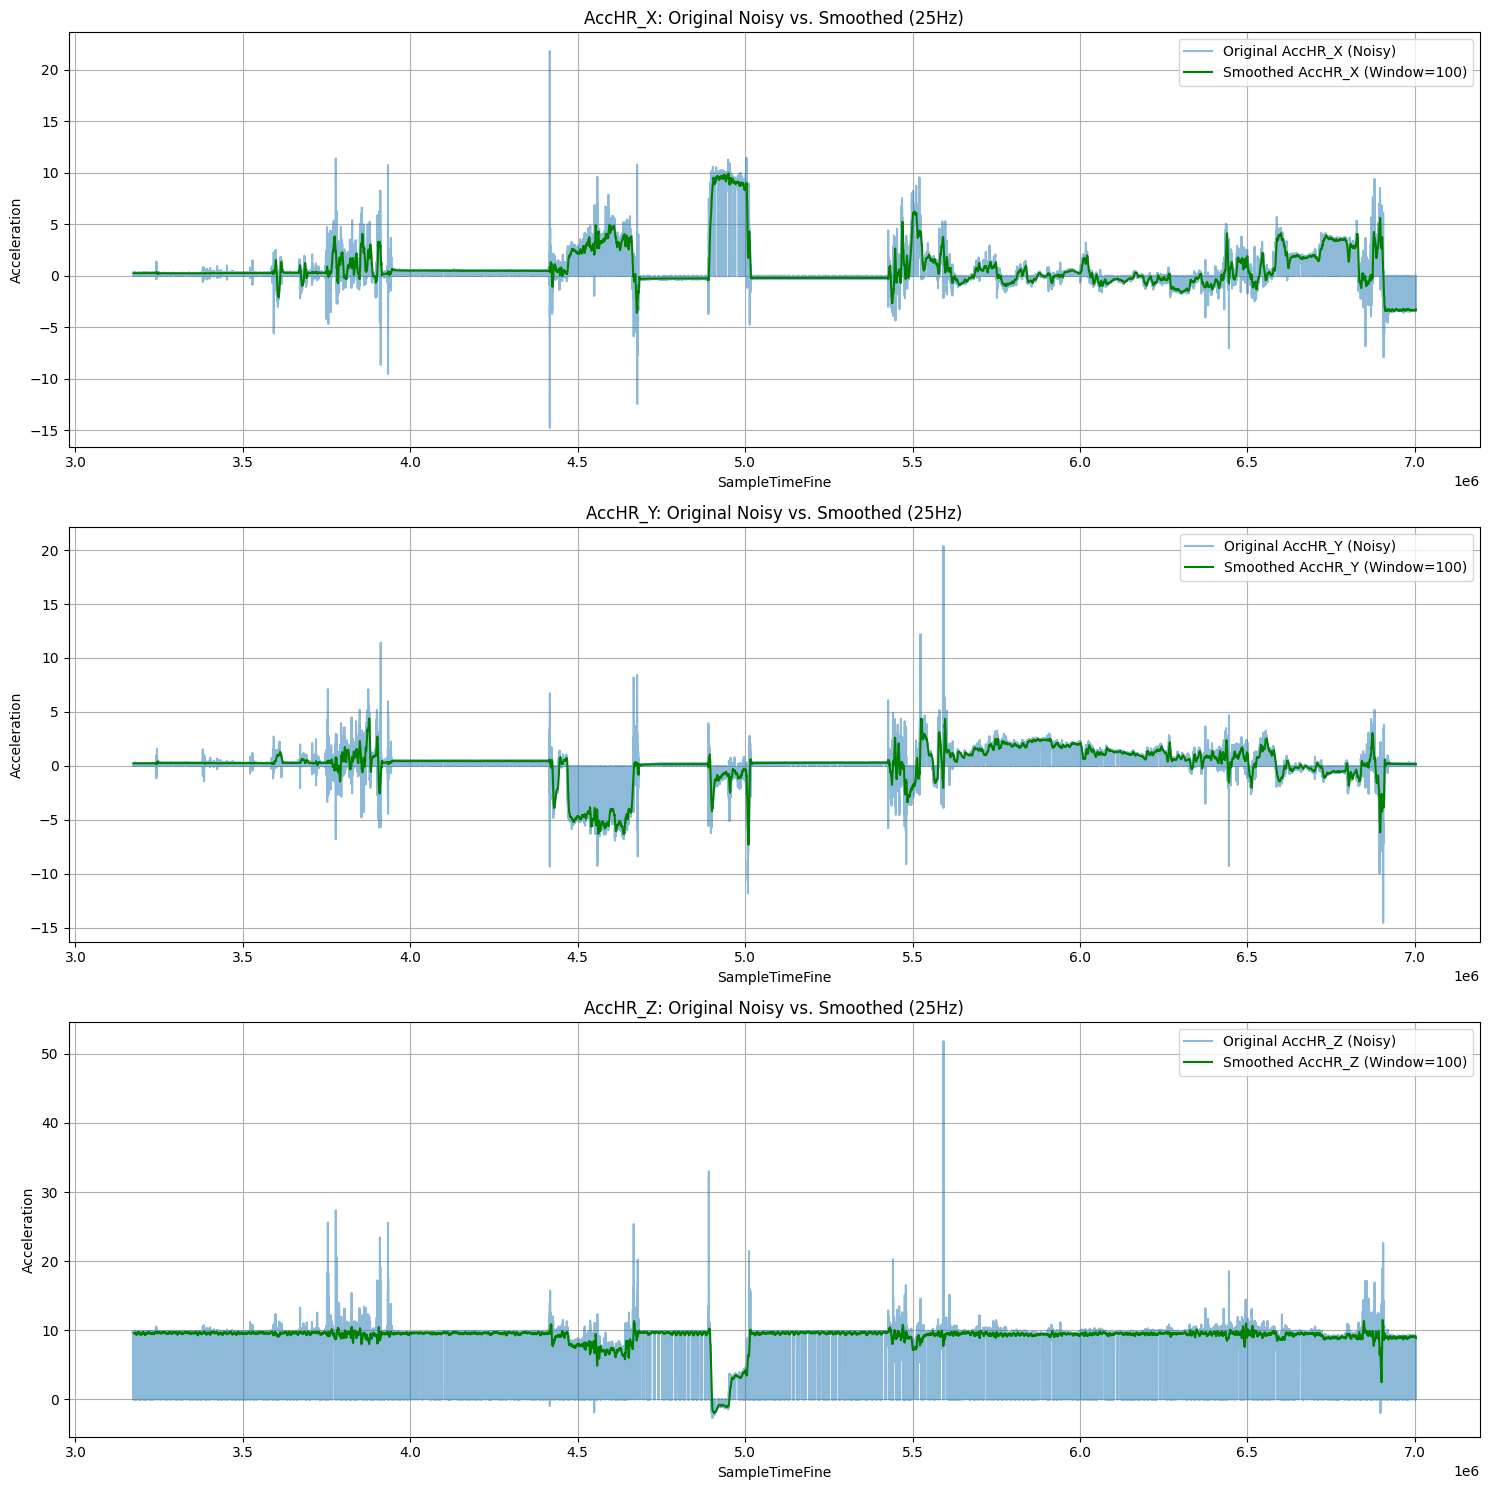

In [354]:
# Plot original vs smoothed for 25Hz noisy data (smoothed data replaces original columns)
plt.figure(figsize=(15, 15))

for i, col in enumerate(acc_cols):
    plt.subplot(3, 1, i + 1)

    # Plot original (before smoothing)
    plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz[col], label=f'Original {col} (Noisy)', alpha=0.5)

    # Plot smoothed (after replacing original columns)
    plt.plot(df_noise_25hz_cleaned['SampleTimeFine'], df_noise_25hz_cleaned[col], label=f'Smoothed {col} (Window={window_size_25hz})', color='green')

    plt.title(f'{col}: Original Noisy vs. Smoothed (25Hz)')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


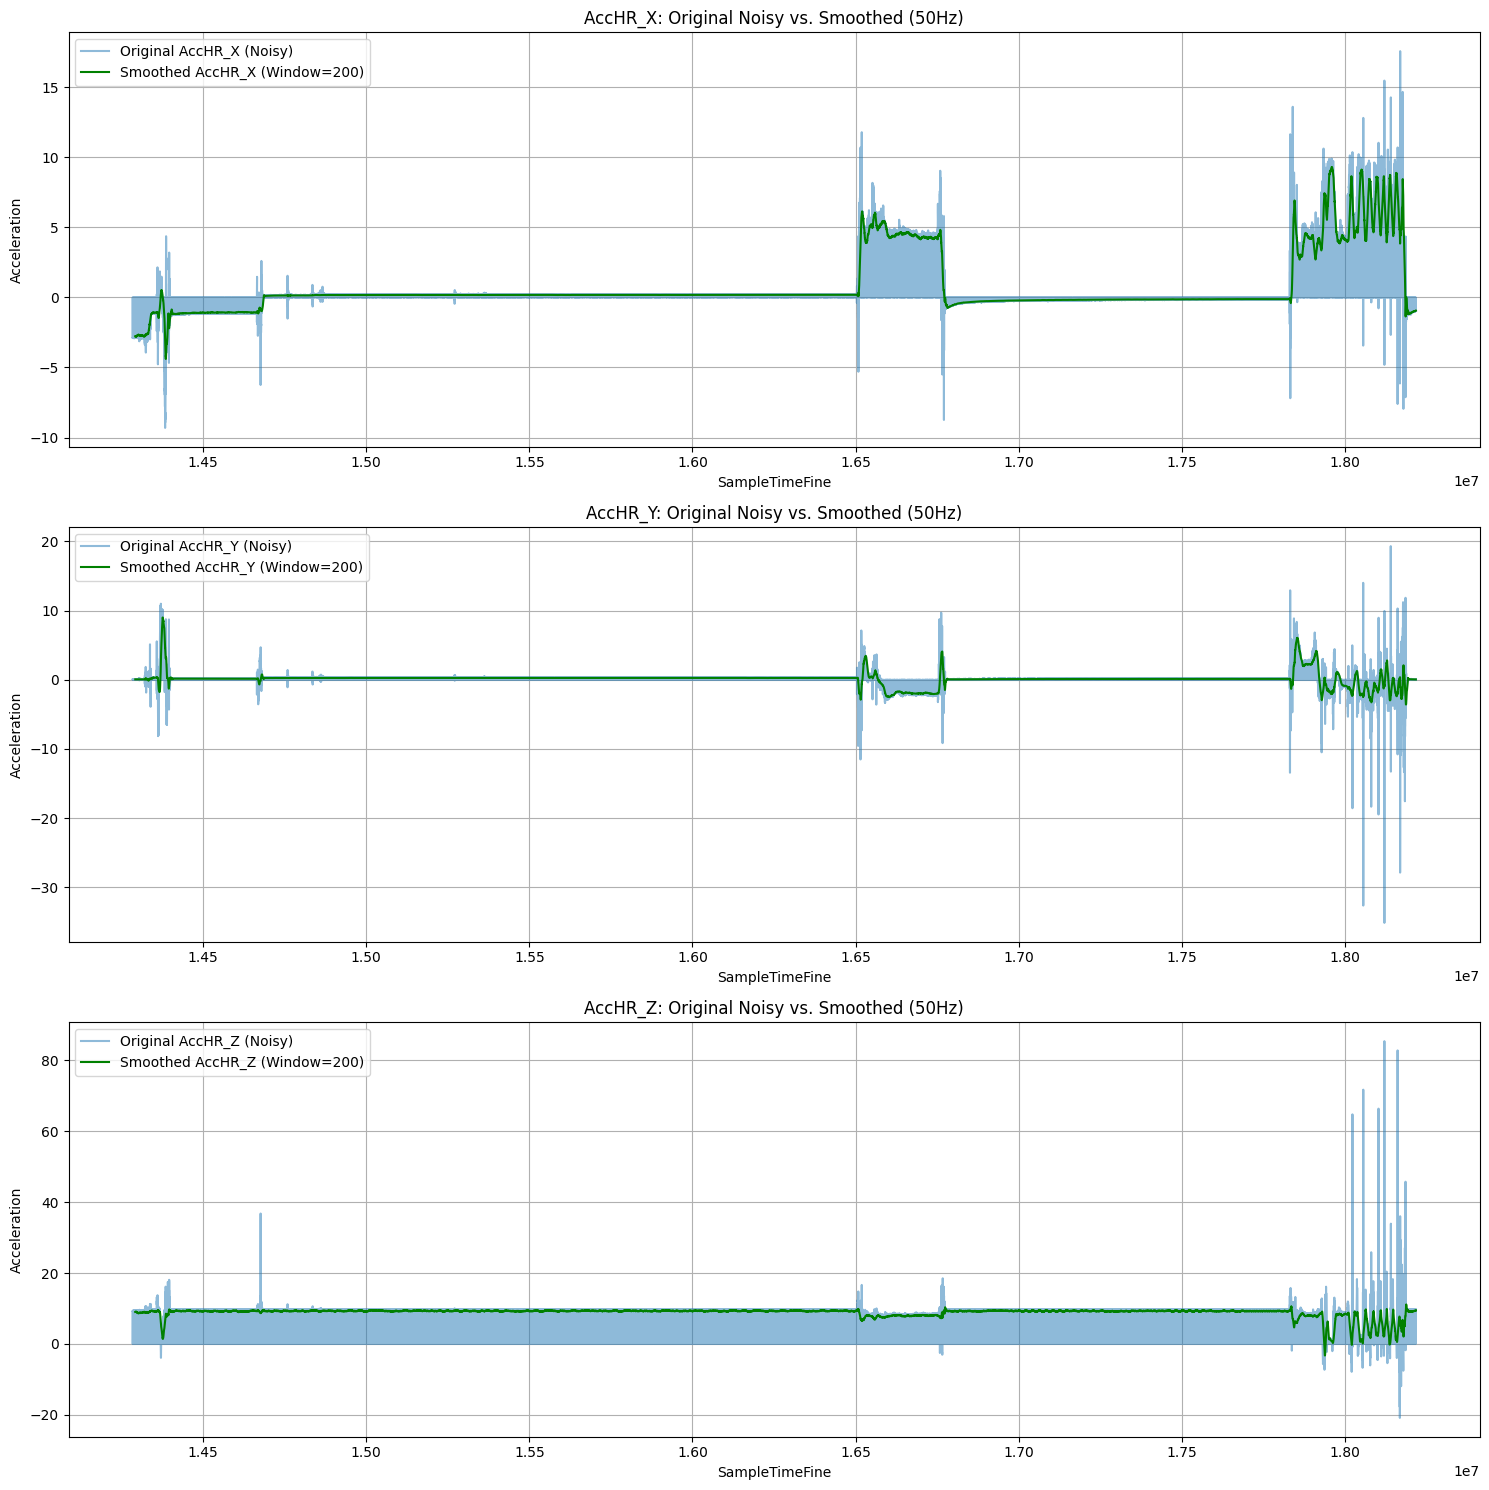

In [355]:
# Plot original vs smoothed for 50Hz noisy data
plt.figure(figsize=(15, 15))

for i, col in enumerate(acc_cols):
    plt.subplot(3, 1, i + 1)

    # Original noisy data
    plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz[col], label=f'Original {col} (Noisy)', alpha=0.5)

    # Smoothed data (replaced in the same column)
    plt.plot(df_noise_50hz_cleaned['SampleTimeFine'], df_noise_50hz_cleaned[col], label=f'Smoothed {col} (Window={window_size_50hz})', color='green')

    plt.title(f'{col}: Original Noisy vs. Smoothed (50Hz)')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


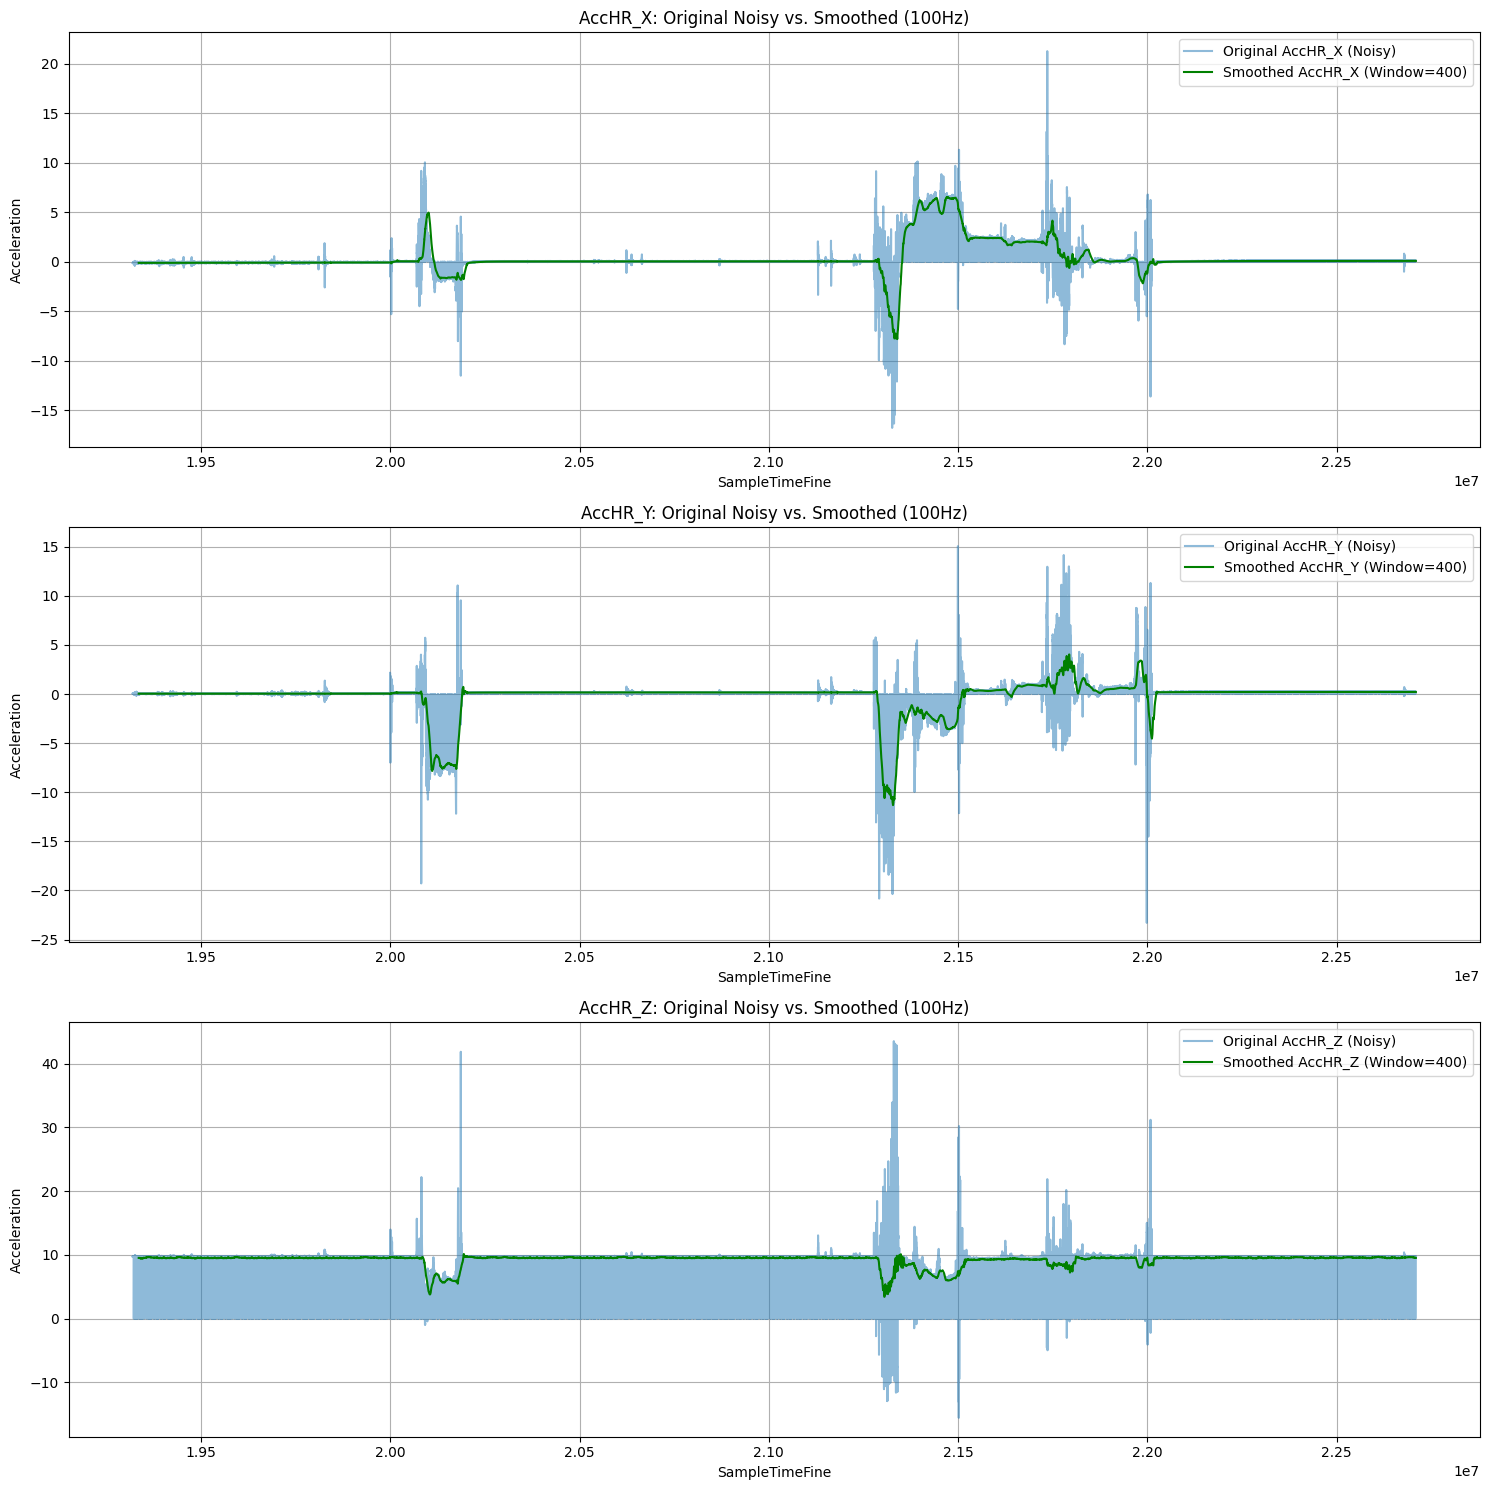

In [356]:
# Plot original vs smoothed for 100Hz noisy data
plt.figure(figsize=(15, 15))

for i, col in enumerate(acc_cols):
    plt.subplot(3, 1, i + 1)

    # Original noisy data
    plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz[col], label=f'Original {col} (Noisy)', alpha=0.5)

    # Smoothed data (same column name after overwrite)
    plt.plot(df_noise_100hz_cleaned['SampleTimeFine'], df_noise_100hz_cleaned[col], label=f'Smoothed {col} (Window={window_size_100hz})', color='green')

    plt.title(f'{col}: Original Noisy vs. Smoothed (100Hz)')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [357]:
datasets = {
    "25Hz": df_noise_25hz_cleaned,
    "50Hz": df_noise_50hz_cleaned,
    "100Hz": df_noise_100hz_cleaned
}

# Acceleration columns to analyze
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Loop through each dataset and print summary stats
for label, df in datasets.items():
    smoothed_stats = df[acc_cols].describe()

    print(f"\nSummary Statistics for Smoothed Data ({label}):")
    print(smoothed_stats)



Summary Statistics for Smoothed Data (25Hz):
            AccHR_X       AccHR_Y       AccHR_Z
count  97573.000000  97573.000000  97573.000000
mean       0.714311      0.170128      9.117849
std        1.994308      1.506851      1.545063
min       -3.597575     -7.301746     -1.889708
25%       -0.206239      0.158083      9.306309
50%        0.260000      0.289519      9.524724
75%        0.762516      0.770660      9.648438
max        9.937273      4.393195     11.502519

Summary Statistics for Smoothed Data (50Hz):
            AccHR_X       AccHR_Y       AccHR_Z
count  97535.000000  97535.000000  97535.000000
mean       0.681030      0.115528      8.881147
std        2.044659      0.913190      1.385371
min       -4.391196     -3.554404     -3.256548
25%       -0.148101      0.118917      9.175866
50%        0.171171      0.256412      9.305469
75%        0.176691      0.263714      9.372933
max        9.293345      9.008562     11.146000

Summary Statistics for Smoothed Data (100Hz

In [358]:
# Create dictionaries for original and smoothed noisy data
original_dataframes = {
    "25Hz": df_noise_25hz,
    "50Hz": df_noise_50hz,
    "100Hz": df_noise_100hz
}

smoothed_dataframes = {
    "25Hz": df_noise_25hz_cleaned,
    "50Hz": df_noise_50hz_cleaned,
    "100Hz": df_noise_100hz_cleaned
}

# Noise Reduction Summary
for name in ["25Hz", "50Hz", "100Hz"]:
    print(f"\nNoise Reduction Assessment for {name}")

    original_df = original_dataframes[name]
    smoothed_df = smoothed_dataframes[name]

    # Compute standard deviations for accelerometer columns
    original_std = original_df[acc_cols].std()
    smoothed_std = smoothed_df[acc_cols].std()

    # Calculate % reduction in standard deviation
    percentage_reduction = ((original_std - smoothed_std) / original_std) * 100

    # Display results
    print("\nStandard Deviation - Original (Noisy):")
    print(original_std.round(4))

    print("\nStandard Deviation - Smoothed:")
    print(smoothed_std.round(4))

    print("\nPercentage Reduction in Noise (Standard Deviation):")
    print(percentage_reduction.round(2))
    print("-" * 60)





Noise Reduction Assessment for 25Hz

Standard Deviation - Original (Noisy):
AccHR_X    2.0802
AccHR_Y    1.5978
AccHR_Z    2.0293
dtype: float64

Standard Deviation - Smoothed:
AccHR_X    1.9943
AccHR_Y    1.5069
AccHR_Z    1.5451
dtype: float64

Percentage Reduction in Noise (Standard Deviation):
AccHR_X     4.13
AccHR_Y     5.69
AccHR_Z    23.86
dtype: float64
------------------------------------------------------------

Noise Reduction Assessment for 50Hz

Standard Deviation - Original (Noisy):
AccHR_X    2.1867
AccHR_Y    1.2192
AccHR_Z    2.7404
dtype: float64

Standard Deviation - Smoothed:
AccHR_X    2.0447
AccHR_Y    0.9132
AccHR_Z    1.3854
dtype: float64

Percentage Reduction in Noise (Standard Deviation):
AccHR_X     6.49
AccHR_Y    25.10
AccHR_Z    49.45
dtype: float64
------------------------------------------------------------

Noise Reduction Assessment for 100Hz

Standard Deviation - Original (Noisy):
AccHR_X    1.7477
AccHR_Y    2.0606
AccHR_Z    2.3732
dtype: float64


**Build a self-learning machine learning model that can accurately predict key sensor parameters (Temperature, magnetic field, pressure, fabrication, wind etc.) with high precision and low error.**

In [359]:
# Combine clean and smoothed noisy data with labels and frequency information

df_25hz['label'] = 0
df_25hz['Freq'] = 25

df_noise_25hz_cleaned['label'] = 1
df_noise_25hz_cleaned['Freq'] = 25

df_50hz['label'] = 0
df_50hz['Freq'] = 50

df_noise_50hz_cleaned['label'] = 1
df_noise_50hz_cleaned['Freq'] = 50

df_100hz['label'] = 0
df_100hz['Freq'] = 100

df_noise_100hz_cleaned['label'] = 1
df_noise_100hz_cleaned['Freq'] = 100

# Combine all dataframes
combined_df = pd.concat([
    df_25hz, df_noise_25hz_cleaned,
    df_50hz, df_noise_50hz_cleaned,
    df_100hz, df_noise_100hz_cleaned
], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

# Display info and missing values for the combined dataframe
print("\nInfo for combined_df:")
combined_df.info()

print("\nMissing values in combined_df:")
print(combined_df.isnull().sum())

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,label,Freq
0,57364,38214066,0.0,0.0,0.0,-0.004889,0.327786,9.762954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
1,57366,38214106,0.0,0.0,0.0,-0.043509,0.356337,9.739222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
2,57368,38214145,0.0,0.0,0.0,-0.029078,0.342039,9.739135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
3,57369,38214165,0.0,0.0,0.0,-0.000167,0.342172,9.762895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
4,57371,38214205,0.0,0.0,0.0,0.019263,0.313533,9.781975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25



Info for combined_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562860 entries, 0 to 1562859
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   PacketCounter   1562860 non-null  int64  
 1   SampleTimeFine  1562860 non-null  int64  
 2   Acc_X           1562860 non-null  float64
 3   Acc_Y           1562860 non-null  float64
 4   Acc_Z           1562860 non-null  float64
 5   AccHR_X         1562860 non-null  float64
 6   AccHR_Y         1562860 non-null  float64
 7   AccHR_Z         1562860 non-null  float64
 8   Mag_X           1562860 non-null  float64
 9   Mag_Y           1562860 non-null  float64
 10  Mag_Z           1562860 non-null  float64
 11  Roll            1562860 non-null  float64
 12  Pitch           1562860 non-null  float64
 13  Yaw             1562860 non-null  float64
 14  Temperature     1562860 non-null  float64
 15  label           1562860 non-null  int64  
 16  Freq         

In [360]:
# Prepare data for Temperature prediction
X_temp = combined_df.drop(['Temperature', 'label', 'Freq'], axis=1)
y_temp = combined_df['Temperature']

# Prepare data for Magnetic field prediction (Mag_X, Mag_Y, Mag_Z)
mag_features = ['AccHR_X', 'AccHR_Y', 'AccHR_Z', 'Temperature', 'Roll', 'Pitch', 'Yaw', 'Freq']
X_mag = combined_df[mag_features]
y_mag = combined_df[['Mag_X', 'Mag_Y', 'Mag_Z']]

print("Shape of X_temp:", X_temp.shape)
print("Shape of y_temp:", y_temp.shape)
print("Shape of X_mag:", X_mag.shape)
print("Shape of y_mag:", y_mag.shape)

Shape of X_temp: (1562860, 14)
Shape of y_temp: (1562860,)
Shape of X_mag: (1562860, 8)
Shape of y_mag: (1562860, 3)


In [361]:
from sklearn.model_selection import train_test_split

# Split data for Temperature prediction
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Split data for Magnetic field prediction
X_mag_train, X_mag_test, y_mag_train, y_mag_test = train_test_split(X_mag, y_mag, test_size=0.2, random_state=42)

print("X_temp_train shape:", X_temp_train.shape)
print("X_temp_test shape:", X_temp_test.shape)
print("y_temp_train shape:", y_temp_train.shape)
print("y_temp_test shape:", y_temp_test.shape)
print("\nX_mag_train shape:", X_mag_train.shape)
print("X_mag_test shape:", X_mag_test.shape)
print("y_mag_train shape:", y_mag_train.shape)
print("y_mag_test shape:", y_mag_test.shape)

X_temp_train shape: (1250288, 14)
X_temp_test shape: (312572, 14)
y_temp_train shape: (1250288,)
y_temp_test shape: (312572,)

X_mag_train shape: (1250288, 8)
X_mag_test shape: (312572, 8)
y_mag_train shape: (1250288, 3)
y_mag_test shape: (312572, 3)


In [362]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model for Temperature prediction
temp_model = LinearRegression()
temp_model.fit(X_temp_train, y_temp_train)

# Initialize and train the Linear Regression model for Magnetic field prediction
mag_model = LinearRegression()
mag_model.fit(X_mag_train, y_mag_train)

print("Temperature model trained.")
print("Magnetic field model trained.")

Temperature model trained.
Magnetic field model trained.


In [363]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test sets
y_temp_pred = temp_model.predict(X_temp_test)
y_mag_pred = mag_model.predict(X_mag_test)

# Evaluate the Temperature model
mae_temp = mean_absolute_error(y_temp_test, y_temp_pred)
mse_temp = mean_squared_error(y_temp_test, y_temp_pred)

print(f"Temperature Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae_temp:.4f}")
print(f"  Mean Squared Error (MSE): {mse_temp:.4f}")

# Evaluate the Magnetic field model
mae_mag = mean_absolute_error(y_mag_test, y_mag_pred)
mse_mag = mean_squared_error(y_mag_test, y_mag_pred)

print(f"\nMagnetic Field Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae_mag:.4f}")
print(f"  Mean Squared Error (MSE): {mse_mag:.4f}")

Temperature Model Evaluation:
  Mean Absolute Error (MAE): 0.0439
  Mean Squared Error (MSE): 0.0831

Magnetic Field Model Evaluation:
  Mean Absolute Error (MAE): 0.0088
  Mean Squared Error (MSE): 0.0089


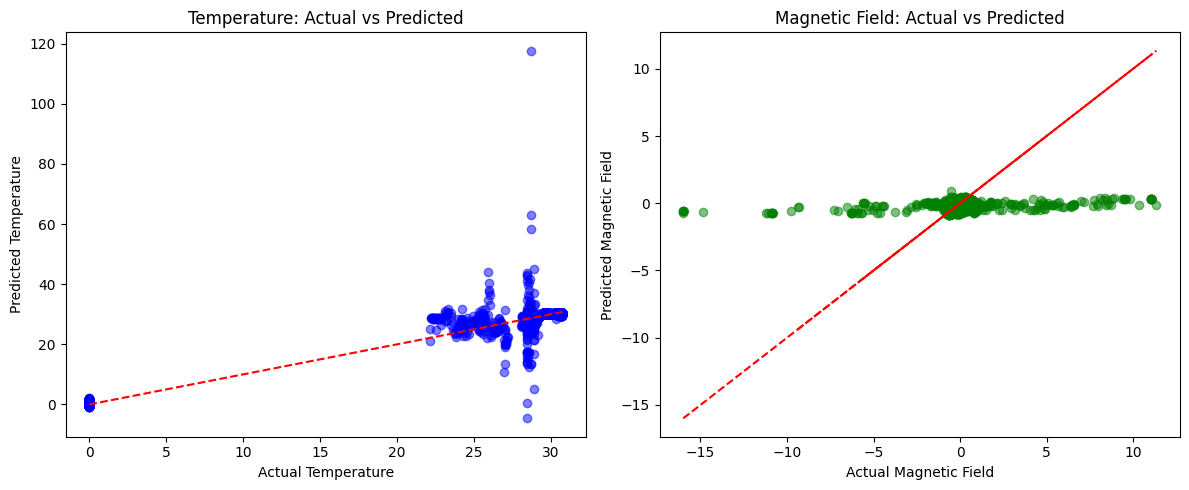

In [364]:
# Plot for Temperature Model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_temp_test, y_temp_pred, color='blue', alpha=0.5)
plt.plot([y_temp_test.min(), y_temp_test.max()], [y_temp_test.min(), y_temp_test.max()], 'r--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')

# Plot for Magnetic Field Model
plt.subplot(1, 2, 2)
plt.scatter(y_mag_test, y_mag_pred, color='green', alpha=0.5)
plt.plot([y_mag_test.min(), y_mag_test.max()], [y_mag_test.min(), y_mag_test.max()], 'r--')
plt.xlabel('Actual Magnetic Field')
plt.ylabel('Predicted Magnetic Field')
plt.title('Magnetic Field: Actual vs Predicted')

plt.tight_layout()
plt.show()

In [365]:
import pickle

# Save the Temperature prediction model
with open('temp_model.pkl', 'wb') as f:
    pickle.dump(temp_model, f)

# Save the Magnetic field prediction model
with open('mag_model.pkl', 'wb') as f:
    pickle.dump(mag_model, f)

print("Temperature and Magnetic field models saved successfully.")

Temperature and Magnetic field models saved successfully.
